# Regresión Lineal Simple

In [1]:
# Importar el dataset
dataset = read.csv('Salary_Data.csv')

In [2]:
dataset

YearsExperience,Salary
<dbl>,<dbl>
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642
3.0,60150
3.2,54445
3.2,64445


In [6]:
library(caTools)

In [7]:
set.seed(123)

In [8]:
split = sample.split(dataset$Salary, SplitRatio = 2/3)

In [9]:
training_set = subset(dataset, split == TRUE)

In [10]:
training_set

,YearsExperience,Salary
,<dbl>,<dbl>
1,1.1,39343
3,1.5,37731
6,2.9,56642
7,3.0,60150
9,3.2,64445
10,3.7,57189
12,4.0,55794
13,4.0,56957
14,4.1,57081


In [11]:
testing_set = subset(dataset, split == FALSE)

In [12]:
testing_set

,YearsExperience,Salary
,<dbl>,<dbl>
2,1.3,46205
4,2.0,43525
5,2.2,39891
8,3.2,54445
11,3.9,63218
16,4.9,67938
20,6.0,93940
21,6.8,91738
24,8.2,113812


In [13]:
?lm

lm {stats},R Documentation
formula,"an object of class ""formula"" (or one that can be coerced to that class): a symbolic description of the model to be fitted. The details of model specification are given under ‘Details’."
data,"an optional data frame, list or environment (or object coercible by as.data.frame to a data frame) containing the variables in the model. If not found in data, the variables are taken from environment(formula), typically the environment from which lm is called."
subset,an optional vector specifying a subset of observations to be used in the fitting process.
weights,"an optional vector of weights to be used in the fitting process. Should be NULL or a numeric vector. If non-NULL, weighted least squares is used with weights weights (that is, minimizing sum(w*e^2)); otherwise ordinary least squares is used. See also ‘Details’,"
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful."
method,"the method to be used; for fitting, currently only method = ""qr"" is supported; method = ""model.frame"" returns the model frame (the same as with model = TRUE, see below)."
"model, x, y, qr","logicals. If TRUE the corresponding components of the fit (the model frame, the model matrix, the response, the QR decomposition) are returned."
singular.ok,logical. If FALSE (the default in S but not in R) a singular fit is an error.
contrasts,an optional list. See the contrasts.arg of model.matrix.default.
offset,"this can be used to specify an a priori known component to be included in the linear predictor during fitting. This should be NULL or a numeric vector or matrix of extents matching those of the response. One or more offset terms can be included in the formula instead or as well, and if more than one are specified their sum is used. See model.offset."


In [14]:
regressor = lm(formula = Salary ~ YearsExperience,
               data = training_set)

In [15]:
summary(regressor)


Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7325.1 -3814.4   427.7  3559.7  8884.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25592       2646   9.672 1.49e-08 ***
YearsExperience     9365        421  22.245 1.52e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5391 on 18 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.963 
F-statistic: 494.8 on 1 and 18 DF,  p-value: 1.524e-14


In [2]:
?predict

predict {stats},R Documentation
object,a model object for which prediction is desired.
...,additional arguments affecting the predictions produced.


In [19]:
y_pred = predict(regressor, newdata = testing_set)

In [23]:
y_pred

2         4         5         8        11        16        20        21 
 37766.77  44322.33  46195.35  55560.43  62115.99  71481.07  81782.66  89274.72 
       24        26 
102385.84 109877.90

In [24]:
print(y_pred)

        2         4         5         8        11        16        20        21 
 37766.77  44322.33  46195.35  55560.43  62115.99  71481.07  81782.66  89274.72 
       24        26 
102385.84 109877.90 


# Visualización de los resultados en el conjunto de entrenamiento

In [32]:
library(ggplot2)

In [33]:
??ggplot2

R Information

Vignettes with name or keyword or title matching ‘ggplot2’ using fuzzy
matching:


ggplot2::extending-ggplot2
                        Extending ggplot2
ggplot2::ggplot2-in-packages
                        Using ggplot2 in packages
ggplot2::ggplot2-specs
                        Aesthetic specifications


Type 'vignette("FOO", package="PKG")' to inspect entries 'PKG::FOO'.



Help files with alias or concept or title matching ‘ggplot2’ using
fuzzy matching:


colorspace::scale_colour_binned_diverging
                        HCL-Based Binned Diverging Color Scales for
                        ggplot2
colorspace::scale_colour_binned_divergingx
                        HCL-Based Binned Flexible Diverging Scales for
                        ggplot2
colorspace::scale_colour_binned_qualitative
                        HCL-Based Binned Qualitative Color Scales for
                        ggplot2
colorspace::scale_colour_binned_sequential
                        HCL-Based Binned Seque

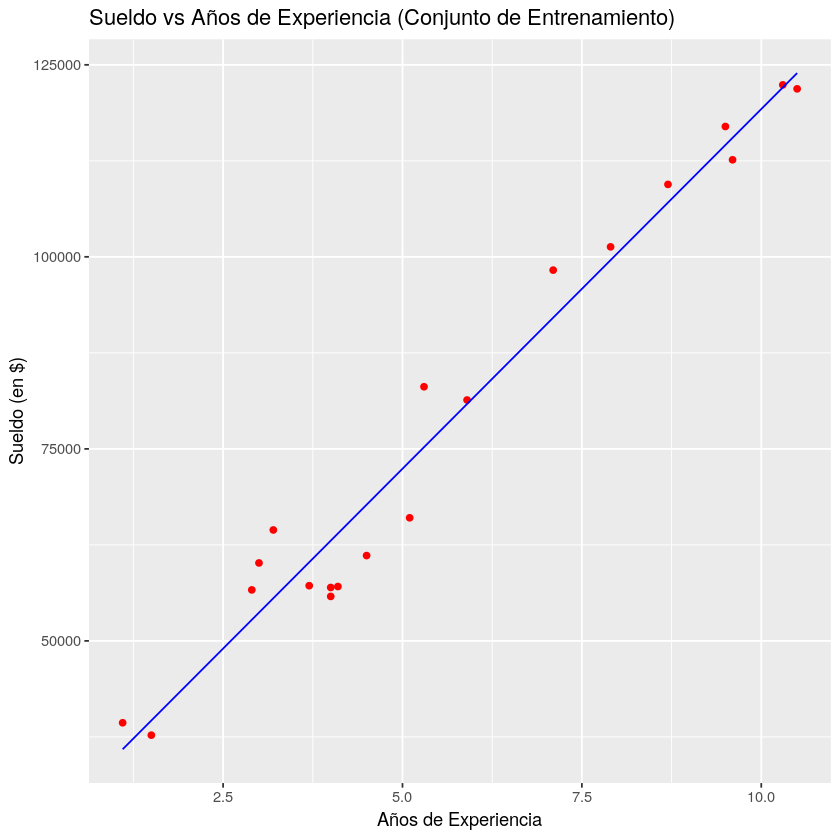

In [34]:
ggplot() + 
geom_point(aes(x = training_set$YearsExperience, y = training_set$Salary),
             colour = "red") +
geom_line(aes(x = training_set$YearsExperience, 
                y = predict(regressor, newdata = training_set)),
            colour = "blue") +
ggtitle("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)") +
xlab("Años de Experiencia") +
ylab("Sueldo (en $)")

# Visualización de los resultados en el conjunto de testing

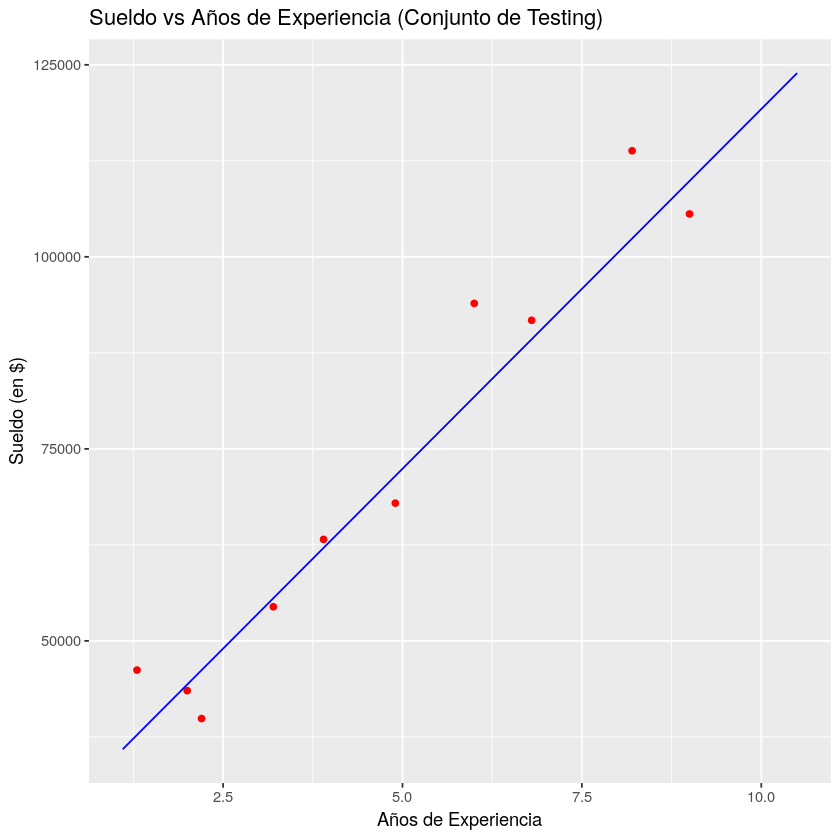

In [38]:
ggplot() + 
geom_point(aes(x = testing_set$YearsExperience, 
               y = testing_set$Salary),
           colour = "red") +
geom_line(aes(x = training_set$YearsExperience, 
             y = predict(regressor, 
             newdata = training_set)),
         colour = "blue") +
ggtitle("Sueldo vs Años de Experiencia (Conjunto de Testing)") +
xlab("Años de Experiencia") +
ylab("Sueldo (en $)")